# Shogi project notebook

This notebook is for an experimental purpose and actually a first project that I applied my data science knowledges.

### Background of this project:
 In Japan (my home country), there is a chess-like board game called "Shogi". It's popular in Japan and majority of Japanese knows the rule of it. However, usually amature players do not know some specific rules those only applies when rare special condition occurs. One of them is called "Sen-nichite"(千日手). I will not explain what actually is a condition for Sen-nichite, since it requires a prior knowledge of rule for Shogi. Anyways, Sen-nichite is an extremely rare condition that occurs in the game. In a professional league of Shogi, if player faced with Sen-nichite, they need to restart game itself. Now, since professional Shogi players usually has a long career, even Sen-nichite is rare, often they faces with it. This fact encouraged me to figure out (or predict) whether that specific professional player has had Sen-nichite more than 10 times on their career or not.

### What to do:
 Scrape data from following website to get raw data. 
 > http://kenyu1234.php.xdomain.jp/record.php? 
 
 Then, analyze data and construct predictive model using scikit learn.

### Goal
 Classify player to either "got Sen-nichite less then 10 times" or "got Sen-nichite more than 10 times" based on input.

## Actual code stars from here

In [230]:
# magic command to auto reload external py file
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
# import data analysis packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
# import user-defined function from original py file
from scraper import get_soup, get_table_rows, get_table_columns

In [41]:
# target url
target_url = 'http://kenyu1234.php.xdomain.jp/record.php?'

# get raw data from target url
soup = get_soup(target_url, 'html5lib')
table_rows = get_table_rows(soup)

In [84]:
table_columns = get_table_columns(soup)

In [85]:
# convert scraped raw data into pandas dataframe 
table_rows = np.array(table_rows).reshape(-1, 25)
shogi_table = pd.DataFrame(table_rows, columns=table_columns)
shogi_table.head()

,棋番,棋士名,生年月日,年齢,プロ入り,現役期間,師匠,対局,勝数,敗数,...,後勝,後敗,後勝率,不戦勝,不戦敗,持,持将棋/対局数,千,千日手/対局数,先後勝率比
0,2,木村義雄★,1905-02-21,81歳08ヶ月(没),1920-04-01,32年04ヶ月(引退),関根金次郎,12,6,6,...,3,5,0.375,0,0,0,,0,,
1,5,萩原淳★,1904-10-11,83歳02ヶ月(没),1925-04-01,38年11ヶ月(引退),土居市太郎,232,85,146,...,9,20,0.310,3,15,2,0.009,1,0.004,1.510
2,7,大野源一★,1911-09-01,67歳04ヶ月(没),1929-04-01,49年09ヶ月(引退),木見金治郎,828,414,413,...,147,140,0.512,2,4,3,0.004,9,0.011,0.920
3,,斎藤銀次郎★,1904-10-07,75歳02ヶ月(没),1929-04-01,36年04ヶ月(引退),石井秀吉,259,103,156,...,0,6,0.000,1,0,0,,0,,
4,9,市川一郎★,1903-02-18,78歳07ヶ月(没),1930-04-01,25年11ヶ月(引退),大崎熊雄,49,16,33,...,0,0,,0,2,0,,1,0.020,


EDA to start

In [33]:
shogi_table.shape

(326, 25)

In [86]:
shogi_table = shogi_table.replace(r'^\s*$', np.nan, regex=True)

In [87]:
shogi_table.isna().sum()

棋番          15
棋士名          0
生年月日         0
年齢           0
プロ入り         0
現役期間         0
師匠           0
対局           0
勝数           0
敗数           0
持局           0
勝率           0
先勝           0
先敗           0
先勝率          2
後勝           0
後敗           0
後勝率          2
不戦勝          0
不戦敗          0
持            0
持将棋/対局数    119
千            0
千日手/対局数     18
先後勝率比       12
dtype: int64

In [88]:
shogi_table.head()

,棋番,棋士名,生年月日,年齢,プロ入り,現役期間,師匠,対局,勝数,敗数,...,後勝,後敗,後勝率,不戦勝,不戦敗,持,持将棋/対局数,千,千日手/対局数,先後勝率比
0,2,木村義雄★,1905-02-21,81歳08ヶ月(没),1920-04-01,32年04ヶ月(引退),関根金次郎,12,6,6,...,3,5,0.375,0,0,0,NaN,0,NaN,NaN
1,5,萩原淳★,1904-10-11,83歳02ヶ月(没),1925-04-01,38年11ヶ月(引退),土居市太郎,232,85,146,...,9,20,0.310,3,15,2,0.009,1,0.004,1.510
2,7,大野源一★,1911-09-01,67歳04ヶ月(没),1929-04-01,49年09ヶ月(引退),木見金治郎,828,414,413,...,147,140,0.512,2,4,3,0.004,9,0.011,0.920
3,NaN,斎藤銀次郎★,1904-10-07,75歳02ヶ月(没),1929-04-01,36年04ヶ月(引退),石井秀吉,259,103,156,...,0,6,0.000,1,0,0,NaN,0,NaN,NaN
4,9,市川一郎★,1903-02-18,78歳07ヶ月(没),1930-04-01,25年11ヶ月(引退),大崎熊雄,49,16,33,...,0,0,NaN,0,2,0,NaN,1,0.020,NaN


In [89]:
# drop unrelated columns for goal
shogi_table.drop(['棋番', '棋士名', '生年月日', 'プロ入り', '師匠', '持将棋/対局数'], axis=1, inplace=True)
shogi_table.head()

,年齢,現役期間,対局,勝数,敗数,持局,勝率,先勝,先敗,先勝率,後勝,後敗,後勝率,不戦勝,不戦敗,持,千,千日手/対局数,先後勝率比
0,81歳08ヶ月(没),32年04ヶ月(引退),12,6,6,0,0.5000,0,0,NaN,3,5,0.375,0,0,0,0,NaN,NaN
1,83歳02ヶ月(没),38年11ヶ月(引退),232,85,146,1,0.3680,15,17,0.469,9,20,0.310,3,15,2,1,0.004,1.510
2,67歳04ヶ月(没),49年09ヶ月(引退),828,414,413,1,0.5006,122,137,0.471,147,140,0.512,2,4,3,9,0.011,0.920
3,75歳02ヶ月(没),36年04ヶ月(引退),259,103,156,0,0.3977,1,10,0.091,0,6,0.000,1,0,0,0,NaN,NaN
4,78歳07ヶ月(没),25年11ヶ月(引退),49,16,33,0,0.3265,1,3,0.250,0,0,NaN,0,2,0,1,0.020,NaN


In [90]:
shogi_table.isna().sum()

年齢          0
現役期間        0
対局          0
勝数          0
敗数          0
持局          0
勝率          0
先勝          0
先敗          0
先勝率         2
後勝          0
後敗          0
後勝率         2
不戦勝         0
不戦敗         0
持           0
千           0
千日手/対局数    18
先後勝率比      12
dtype: int64

In [82]:
# convert string data (年齢、現役期間) into year
# in this case, if month is greater than 6 months, increment year by one
def year_conversion(year_data):
    year = year_data[:2]
    month = year_data[3:5]
    
    if not year.isnumeric():
        year = year_data[:1]
        month = year_data[2:4]
    
    year, month = int(year), int(month)
    
    if month > 6:
        year += 1
    
    return year

In [91]:
shogi_table['年齢'] = shogi_table['年齢'].apply(year_conversion)
shogi_table['現役期間'] = shogi_table['現役期間'].apply(year_conversion)
shogi_table.head()

,年齢,現役期間,対局,勝数,敗数,持局,勝率,先勝,先敗,先勝率,後勝,後敗,後勝率,不戦勝,不戦敗,持,千,千日手/対局数,先後勝率比
0,82,32,12,6,6,0,0.5000,0,0,NaN,3,5,0.375,0,0,0,0,NaN,NaN
1,83,39,232,85,146,1,0.3680,15,17,0.469,9,20,0.310,3,15,2,1,0.004,1.510
2,67,50,828,414,413,1,0.5006,122,137,0.471,147,140,0.512,2,4,3,9,0.011,0.920
3,75,36,259,103,156,0,0.3977,1,10,0.091,0,6,0.000,1,0,0,0,NaN,NaN
4,79,26,49,16,33,0,0.3265,1,3,0.250,0,0,NaN,0,2,0,1,0.020,NaN


In [102]:
shogi_table['sen'] = shogi_table['千'].apply(lambda x: 1 if int(x) < 10 else 0)

In [103]:
shogi_table.groupby('sen').count()

,年齢,現役期間,対局,勝数,敗数,持局,勝率,先勝,先敗,先勝率,後勝,後敗,後勝率,不戦勝,不戦敗,持,千,千日手/対局数,先後勝率比
sen,,,,,,,,,,,,,,,,,,,
0,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188
1,138,138,138,138,138,138,138,138,138,136,138,138,136,138,138,138,138,120,126


In [104]:
# EDA
shogi_table.isnull().sum()

年齢          0
現役期間        0
対局          0
勝数          0
敗数          0
持局          0
勝率          0
先勝          0
先敗          0
先勝率         2
後勝          0
後敗          0
後勝率         2
不戦勝         0
不戦敗         0
持           0
千           0
千日手/対局数    18
先後勝率比      12
sen         0
dtype: int64

In [105]:
# every null in 先勝率 and 後勝率 is caused by 0 total for not recording both (先勝, 先敗) and (後勝, 後敗)
# in this case, we can treat this as 'not accomplishing either 先勝 or 先敗 ((後勝, 後敗))'. 
# thus, we will fillna with 0 for both columns
shogi_table['先勝率'] = shogi_table['先勝率'].fillna(0)
shogi_table['後勝率'] = shogi_table['後勝率'].fillna(0)

年齢          0
現役期間        0
対局          0
勝数          0
敗数          0
持局          0
勝率          0
先勝          0
先敗          0
先勝率         0
後勝          0
後敗          0
後勝率         0
不戦勝         0
不戦敗         0
持           0
千           0
千日手/対局数    18
先後勝率比      12
sen         0
dtype: int64

In [106]:
# null in 先後勝率比 has same reasoning as previously stated
shogi_table['先後勝率比'] = shogi_table['先後勝率比'].fillna(0)

In [110]:
shogi_table.isnull().sum()

年齢         0
現役期間       0
対局         0
勝数         0
敗数         0
持局         0
勝率         0
先勝         0
先敗         0
先勝率        0
後勝         0
後敗         0
後勝率        0
不戦勝        0
不戦敗        0
持          0
千          0
千日手/対局数    0
先後勝率比      0
sen        0
dtype: int64

In [109]:
# now, for 千日手/対局数, null only appears if 千 is 0 at particular records, so replace with 0
shogi_table['千日手/対局数'] = shogi_table['千日手/対局数'].fillna(0)

In [111]:
shogi_table.head()

,年齢,現役期間,対局,勝数,敗数,持局,勝率,先勝,先敗,先勝率,後勝,後敗,後勝率,不戦勝,不戦敗,持,千,千日手/対局数,先後勝率比,sen
0,82,32,12,6,6,0,0.5000,0,0,0,3,5,0.375,0,0,0,0,0,0,1
1,83,39,232,85,146,1,0.3680,15,17,0.469,9,20,0.310,3,15,2,1,0.004,1.510,1
2,67,50,828,414,413,1,0.5006,122,137,0.471,147,140,0.512,2,4,3,9,0.011,0.920,1
3,75,36,259,103,156,0,0.3977,1,10,0.091,0,6,0.000,1,0,0,0,0,0,1
4,79,26,49,16,33,0,0.3265,1,3,0.250,0,0,0,0,2,0,1,0.020,0,1


In [210]:
conv_cols = shogi_table.columns[2:-1]

for col in conv_cols:
    shogi_table[col] = pd.to_numeric(shogi_table[col])

shogi_table.head()

,年齢,現役期間,対局,勝率,先勝率,後勝率,不戦勝,不戦敗,持,千,千日手/対局数,先後勝率比,sen
0,82,32,12,0.5000,0.000,0.375,0,0,0,0,0.000,0.00,1
1,83,39,232,0.3680,0.469,0.310,3,15,2,1,0.004,1.51,1
2,67,50,828,0.5006,0.471,0.512,2,4,3,9,0.011,0.92,1
3,75,36,259,0.3977,0.091,0.000,1,0,0,0,0.000,0.00,1
4,79,26,49,0.3265,0.250,0.000,0,2,0,1,0.020,0.00,1


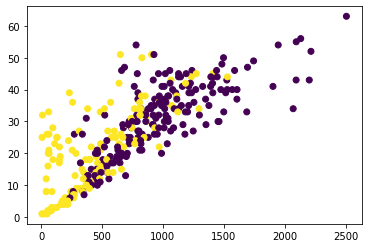

In [211]:
plt.scatter(shogi_table['対局'], shogi_table['現役期間'], c=shogi_table['sen'])

In [128]:
shogi_table.drop(['勝数', '敗数', '持局', '先勝', '先敗', '後勝', '後敗'], axis=1, inplace=True)

In [129]:
shogi_table.head()

,年齢,現役期間,対局,勝率,先勝率,後勝率,不戦勝,不戦敗,持,千,千日手/対局数,先後勝率比,sen
0,82,32,12,0.5000,0,0.375,0,0,0,0,0,0,1
1,83,39,232,0.3680,0.469,0.310,3,15,2,1,0.004,1.510,1
2,67,50,828,0.5006,0.471,0.512,2,4,3,9,0.011,0.920,1
3,75,36,259,0.3977,0.091,0.000,1,0,0,0,0,0,1
4,79,26,49,0.3265,0.250,0,0,2,0,1,0.020,0,1


In [213]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(shogi_table.iloc[:, :12].values, 
                                                    shogi_table.iloc[:, 12].values, 
                                                    test_size=0.3, 
                                                   random_state=50)

In [226]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [166]:
prediction = lr_model.predict(X_test)

In [227]:
print(lr_model.score(X_train, y_train))

1.0


In [228]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_model, X_train, y_train, cv=10)
scores.mean()

0.9911067193675889

In [229]:
print(lr_model.score(X_test, y_test))

1.0


In [218]:
# use SVC as ensemble model
from sklearn.svm import SVC

svc_clf = SVC(kernel='linear', C=5, probability=True)

svc_clf.fit(X_train, y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [219]:
print(svc_clf.score(X_train, y_train))

1.0


In [220]:
print(svc_clf.score(X_test, y_test))

1.0


In [221]:
y_test.shape

(98,)

In [222]:
type(X_test)

numpy.ndarray

In [223]:
from shogi_tester import random_test_data

linreg_res = lr_model.predict_proba(X_test)
svc_res = svc_clf.predict_proba(X_test)
predictions = (linreg_res + svc_res) / 2
prediction = predictions.argmax(axis=1)

print('Inputs | prediction output | test output')

for _ in range(10):
    random_data = random_test_data(X_test, y_test)
    
    pred_input = random_data[1]
    pred_out = prediction[random_data[0]]
    test_out = random_data[2]
    
    print(f'{pred_input} | {pred_out} | {test_out}')

Inputs | prediction output | test output
[6.500e+01 8.000e+00 2.790e+02 4.659e-01 4.860e-01 4.530e-01 0.000e+00
 2.000e+00 1.000e+00 1.000e+00 4.000e-03 1.071e+00] | 1 | 1
[5.700e+01 4.000e+01 1.528e+03 5.357e-01 5.790e-01 4.860e-01 6.000e+00
 0.000e+00 8.000e+00 2.400e+01 1.600e-02 1.193e+00] | 0 | 0
[5.700e+01 4.000e+01 1.476e+03 5.332e-01 5.420e-01 5.220e-01 4.000e+00
 0.000e+00 2.000e+00 3.500e+01 2.400e-02 1.039e+00] | 0 | 0
[5.800e+01 4.300e+01 2.202e+03 6.062e-01 6.490e-01 5.610e-01 3.000e+00
 0.000e+00 8.000e+00 2.700e+01 1.200e-02 1.157e+00] | 0 | 0
[3.100e+01 1.100e+01 3.940e+02 6.168e-01 6.620e-01 5.710e-01 0.000e+00
 0.000e+00 0.000e+00 1.300e+01 3.300e-02 1.158e+00] | 0 | 0
[7.300e+01 4.500e+01 1.411e+03 4.819e-01 4.960e-01 4.610e-01 5.000e+00
 3.000e+00 2.000e+00 8.000e+00 6.000e-03 1.077e+00] | 1 | 1
[5.700e+01 2.900e+01 9.200e+02 5.185e-01 5.850e-01 4.510e-01 3.000e+00
 0.000e+00 0.000e+00 2.400e+01 2.600e-02 1.299e+00] | 0 | 0
[5.100e+01 2.500e+01 7.070e+02 4.738e-01 4

In [224]:
# now, modify iteration in previous cell to actually show how much 千日手 that each players have
from IPython.display import display, Markdown

for _ in range(20):
    random_data = random_test_data(X_test, y_test)
    
    pred_input = random_data[1]
    pred_out = '10回未満' if prediction[random_data[0]] == 1 else '10回以上'
    
    display(Markdown(f'#### 棋士のデータ：{pred_input}'))
    display(Markdown(f'## 千日手の回数：{pred_out}'))

#### 棋士のデータ：[71.     26.     65.      0.3385  0.5     0.25    1.      1.      0.
  0.      0.      2.    ]

## 千日手の回数：10回未満

#### 棋士のデータ：[7.200e+01 2.300e+01 4.880e+02 3.197e-01 3.380e-01 2.980e-01 2.000e+00
 1.000e+00 0.000e+00 7.000e+00 1.400e-02 1.131e+00]

## 千日手の回数：10回未満

#### 棋士のデータ：[5.000e+01 2.900e+01 1.165e+03 5.768e-01 6.060e-01 5.450e-01 1.000e+00
 0.000e+00 0.000e+00 3.800e+01 3.300e-02 1.112e+00]

## 千日手の回数：10回以上

#### 棋士のデータ：[7.500e+01 3.600e+01 2.590e+02 3.977e-01 9.100e-02 0.000e+00 1.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]

## 千日手の回数：10回未満

#### 棋士のデータ：[5.600e+01 3.700e+01 1.115e+03 4.717e-01 5.130e-01 4.300e-01 2.000e+00
 4.000e+00 0.000e+00 2.100e+01 1.900e-02 1.193e+00]

## 千日手の回数：10回以上

#### 棋士のデータ：[7.000e+01 2.600e+01 2.730e+02 4.982e-01 5.500e-01 4.870e-01 1.000e+00
 7.000e+00 5.000e+00 1.800e+01 6.600e-02 1.130e+00]

## 千日手の回数：10回以上

#### 棋士のデータ：[5.700e+01 4.000e+01 1.528e+03 5.357e-01 5.790e-01 4.860e-01 6.000e+00
 0.000e+00 8.000e+00 2.400e+01 1.600e-02 1.193e+00]

## 千日手の回数：10回以上

#### 棋士のデータ：[7.000e+01 4.500e+01 1.274e+03 4.286e-01 4.500e-01 4.040e-01 4.000e+00
 1.000e+00 1.000e+00 9.000e+00 7.000e-03 1.115e+00]

## 千日手の回数：10回未満

#### 棋士のデータ：[4.400e+01 2.600e+01 9.300e+02 5.624e-01 5.680e-01 5.580e-01 1.000e+00
 1.000e+00 3.000e+00 1.100e+01 1.200e-02 1.019e+00]

## 千日手の回数：10回以上

#### 棋士のデータ：[2.200e+01 3.000e+00 9.300e+01 5.699e-01 6.820e-01 4.690e-01 0.000e+00
 0.000e+00 0.000e+00 3.000e+00 3.200e-02 1.453e+00]

## 千日手の回数：10回未満

#### 棋士のデータ：[6.600e+01 4.000e+01 1.080e+03 4.222e-01 4.320e-01 4.110e-01 1.000e+00
 1.000e+00 7.000e+00 1.400e+01 1.300e-02 1.051e+00]

## 千日手の回数：10回以上

#### 棋士のデータ：[4.500e+01 2.700e+01 1.249e+03 6.117e-01 6.260e-01 5.980e-01 2.000e+00
 2.000e+00 2.000e+00 3.000e+01 2.400e-02 1.048e+00]

## 千日手の回数：10回以上

#### 棋士のデータ：[5.500e+01 3.500e+01 1.072e+03 4.543e-01 4.680e-01 3.910e-01 7.000e+00
 4.000e+00 1.000e+00 7.000e+00 7.000e-03 1.199e+00]

## 千日手の回数：10回未満

#### 棋士のデータ：[7.300e+01 4.500e+01 1.411e+03 4.819e-01 4.960e-01 4.610e-01 5.000e+00
 3.000e+00 2.000e+00 8.000e+00 6.000e-03 1.077e+00]

## 千日手の回数：10回未満

#### 棋士のデータ：[ 66.      25.     129.       0.3672   0.4      0.333    0.      10.
   3.       0.       0.       1.2   ]

## 千日手の回数：10回未満

#### 棋士のデータ：[5.000e+01 2.900e+01 1.165e+03 5.768e-01 6.060e-01 5.450e-01 1.000e+00
 0.000e+00 0.000e+00 3.800e+01 3.300e-02 1.112e+00]

## 千日手の回数：10回以上

#### 棋士のデータ：[7.300e+01 4.300e+01 2.094e+03 6.255e-01 6.460e-01 5.970e-01 4.000e+00
 5.000e+00 6.000e+00 2.500e+01 1.200e-02 1.082e+00]

## 千日手の回数：10回以上

#### 棋士のデータ：[2.900e+01 1.200e+01 5.570e+02 6.391e-01 7.390e-01 5.690e-01 1.000e+00
 1.200e+01 2.000e+00 1.000e+01 1.800e-02 1.299e+00]

## 千日手の回数：10回以上

#### 棋士のデータ：[43.     20.     59.      0.4746  0.5     0.8     0.      2.      1.
  4.      0.068   0.625 ]

## 千日手の回数：10回未満

#### 棋士のデータ：[6.200e+01 2.500e+01 5.780e+02 3.858e-01 4.110e-01 3.490e-01 4.000e+00
 1.000e+00 2.000e+00 7.000e+00 1.200e-02 1.177e+00]

## 千日手の回数：10回未満

## Conclusion:
 Based on result for testing data, both logistic regression and svc seems to have really high accuracy. Maybe there is an overfitting for this particular dataset, so it might be better to test with amature player dataset to figure out whether overfitting occured or not in the future.